<center>
    
# Dervadas Numéricas en Datos Experimentales

### Juan Sebastian Sierra Jaraba - jsierraj@unal.edu.co 
### Departamento de Física, Facultad de Ciencias, Sede Bogotá
### Universidad Nacional de Colombia
    
</center>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

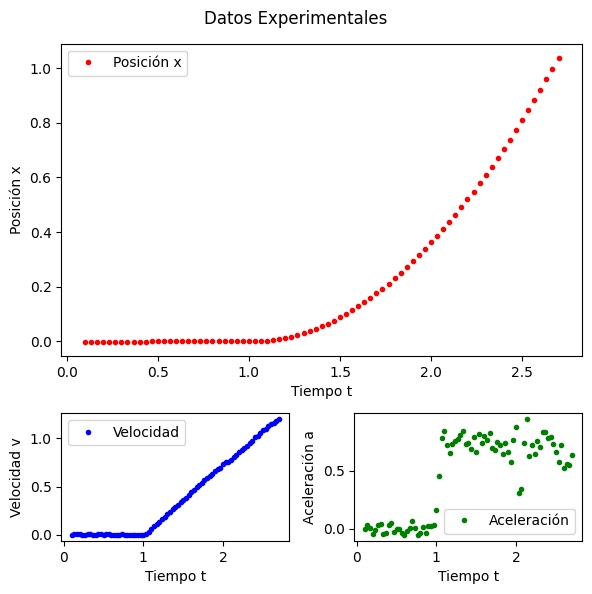

In [2]:
#Datos Experimentales
dataSet = np.genfromtxt("datos-carro-1d.csv", delimiter=',', skip_header=7,skip_footer=2,missing_values=np.nan)

t=dataSet[::, 0]
x=dataSet[::, 1]
v=dataSet[::, 3]
a=dataSet[::, 5]


def create_figures(t, x, v, a, title=""):
    fig = plt.figure(figsize=(6,6))
    fig.suptitle(title)

    ax1 = fig.add_subplot(3,2,(1,4))
    ax1.plot(t, x, ".r", label="Posición x")
    ax1.set_xlabel("Tiempo t")
    ax1.set_ylabel("Posición x")

    ax2 = fig.add_subplot(3,2,5)
    ax2.plot(t, v, ".b", label="Velocidad")
    ax2.set_xlabel("Tiempo t")
    ax2.set_ylabel("Velocidad v")

    ax3 = fig.add_subplot(3,2,6)
    ax3.plot(t, a, ".g", label="Aceleración")
    ax3.set_xlabel("Tiempo t")
    ax3.set_ylabel("Aceleración a")

    fig.tight_layout(pad=1.0)

    ax1.legend()
    ax2.legend()
    ax3.legend()

create_figures(t, x, v, a, "Datos Experimentales")
plt.savefig("datos_experimentales.png")

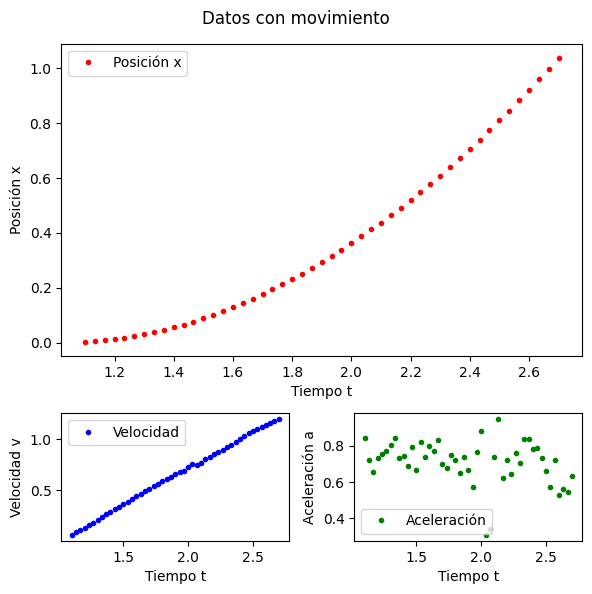

In [3]:
#Encontrar cuando empieza a moverse

for ii in range(10, t.size):
  if abs(x[ii]-x[:ii].mean())>3*x[:ii].std():
    init = ii
    break
    
create_figures(t[init:], x[init:], v[init:], a[init:], "Datos con movimiento")
plt.savefig("rango_movimiento.png")

In [4]:
#Calcular velocidad a partir de derivada central, dejando el valor en 0
#para cuando el objeto no se mueve realmente

size = (np.size(t))
V = np.zeros(size)


V[init:-1] = (x[init+1:]-x[init-1:-2])/((t[init+1:]-t[init-1:-2]))

#El último valor se calcula con derivada backward
V[-1] = (x[-1]-x[-2])/((t[-1]-t[-2]))

In [5]:
#Ajuste lineal de las velocidades

# Definir la función de ajuste
def ajuste_lineal(t, v0_t, a_t):
    return v0_t + a_t*t

# Realizar el ajuste de curva
popt, pcov = curve_fit(ajuste_lineal, t[init:], V[init:])

# Obtener los valores ajustados y los errores
v0_t, a_t = popt
eps_v, eps_a = 3*np.sqrt(np.diag(pcov))

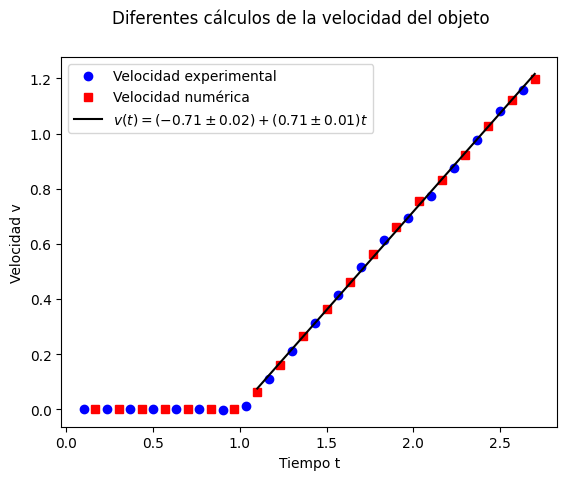

In [6]:
#Se grafica un muestreo intercalado de la velocidad experimental y la calculada
#numéricamente para que sea posible visualizar los datos en una sola figura.
#Los datos son tan cercanos que una curva oculta a la otra

fig = plt.figure()
fig.suptitle("Diferentes cálculos de la velocidad del objeto")

ax = fig.add_subplot()
ax.plot(t[::4], v[::4], "ob", t[2::4], V[2::4], "sr", t[init:], ajuste_lineal(t[init:], v0_t, a_t), "-k")
ax.legend(("Velocidad experimental", "Velocidad numérica", r"$v(t)=(%.2f \pm %.2f)+(%.2f \pm %.2f)t$"%(v0_t, eps_v, a_t, eps_a)))
    
ax.set_xlabel("Tiempo t")
ax.set_ylabel("Velocidad v")

plt.savefig("comparacion_velocidades.png")